[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/francisco-ortin/data-science-course/blob/main/statistics/hypothesis.ipynb)
[![License: CC BY-NC-SA 4.0](https://img.shields.io/badge/License-CC%20BY--NC--SA%204.0-lightgrey.svg)](https://creativecommons.org/licenses/by-nc-sa/4.0/)

# Hypothesis Testing

Hypothesis testing is a statistical method that is used to test whether a certain hypothesis is true or not. We will use the following example. We want to know if a new web design reduces the network traffic on a website. The null hypothesis is that the new design does not reduce the network traffic. The alternative hypothesis is that the new design reduces the network traffic. We will use the t-test to test this hypothesis. 

In [1]:
# make sure the required packages are installed
%pip install numpy matplotlib scipy --quiet
# if running in colab, install the required packages and copy the necessary files
directory='data-science-course/statistics'
if get_ipython().__class__.__module__.startswith('google.colab'):
    !git clone --depth 1 https://github.com/francisco-ortin/data-science-course.git  2>/dev/null
    !cp --update {directory}/*.py .
    !mkdir -p img data
    !cp {directory}/img/* img/.
    !cp {directory}/data/* data/.

Note: you may need to restart the kernel to use updated packages.


## Web design

We create two different web designs (the old and the new) and measure the network traffic for both designs. We have 30 measurements for each design. The data is stored in the following lists.

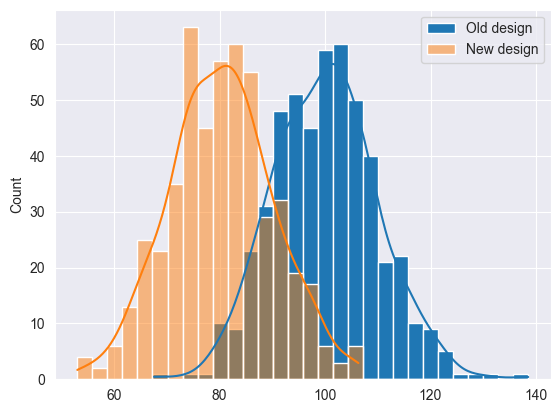

In [8]:
import numpy as np
random_seed = 42
np.random.seed(random_seed)
from web_design import WebDesign
old_web_design = WebDesign("old", mean=100, std=10)
new_web_design = WebDesign("new", mean=80, std=10)
measurements = 500
old_traffic = [old_web_design.measure_network_traffic() for _ in range(measurements)]
new_traffic = [new_web_design.measure_network_traffic() for _ in range(measurements)]
# visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
# compute the same bins for both histograms
bins = np.histogram_bin_edges(old_traffic + new_traffic, bins=30)
# show the histograms
sns.histplot(old_traffic, bins=bins, alpha=1, kde=True, label='Old design')
sns.histplot(new_traffic, bins=bins, alpha=0.5, kde=True, label='New design')
plt.legend()
plt.show()

## Normality test

Let's test the normality of both datasets using the Shapiro-Wilk test.

In [3]:
from scipy.stats import shapiro
_, old_p_value = shapiro(old_traffic)
_, new_p_value = shapiro(new_traffic)
print(f"Old design: p-value = {old_p_value:.4f}")
print(f"Is the old design traffic network normally distributed? {old_p_value > 0.05}.")
print(f"New design: p-value = {new_p_value:.4f}")
print(f"Is the new design traffic network normally distributed? {new_p_value > 0.05}.")

Old design: p-value = 0.4013
Is the old design traffic network normally distributed? True.
New design: p-value = 0.6757
Is the new design traffic network normally distributed? True.


## t-Test

We can apply a z- and t-test because the data is normally distributed and the size of the data sample is greater than 30. We will use a t-test because it is implemented by the `scipy` library. 

We will use the *paired* z-test because we want to compare the two mean measurements from the same group of users. The null hypothesis is that the new design does not reduce the network traffic. The alternative hypothesis is that the new design changes the network traffic. We will use a significance level of 0.05.

In [4]:
from scipy.stats import ttest_rel  # paired t-test
_, p_value = ttest_rel(old_traffic, new_traffic)
print(f"p-value of the t-test= {p_value}")

p-value of the t-test= 3.414361274622606e-117


## ✨ Questions ✨

1. Is the p-value sufficiently low?
2. Which hypothesis is true?
3. Does it mean that the new design changes the network traffic?
4. Does it mean that there is a significant difference between the two designs? 
5. Why?
6. How do we compute the effect size? 

### Answers

*Write your answers here.* 

## Practical importance

Let's first compute the difference between the two means.

In [5]:
print(f"Difference on the traffic between the new design and the old one (GBs/m) is {np.mean(old_traffic) - np.mean(new_traffic):.4f}.")

Difference on the traffic between the new design and the old one (GBs/m) is 19.7501.


Let's compute the effect size using Cohen's d. The common interpretation is that an effect size of 0.2 is small, 0.5 is medium, and 0.8 is large.

In [6]:
from utils import cohen_d
effect_size = cohen_d(old_traffic, new_traffic)
print(f"Effect size computed with Cohen's d: {effect_size:.4f}.")
if effect_size < 0.2:
    print(f"The effect size is small.")
elif effect_size < 0.5:
    print(f"The effect size is medium.")
else:
    print(f"The effect size is large.")

Effect size computed with Cohen's d: 2.0161.
The effect size is large.
